# Basic ML Algorithms


# 1-) Supervised Learning (Labeled Data)

Data is labeled. Therefore, we know the outputs. There are two types of problem in supervised learning; <b> regression and classification</b>. Regression means that we aim to predict the <b>continuous(decimal)</b> value of the output like 15.23, 8900, 15000. Classification means that we aim to predict the <b>dicrete class(category)</b> of the output like male, cat, true.

 First of the outputs is about numerical data but the other is related to categorical data.

# 2-) Unsupervised Learning (Unlabeled Data)


Data is unlabeled. Therefore we don't know the output. Problem in unsupervised data are <b>clustering, association, dimensionality reduction</b>. We can divide the data into  n groups but we can not give them names. 

### Our main library is Scikit Learn

Let's start with importing the libraries into the our project.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## 1. Linear Regression (Predicting Numbers)

This is the "Hello World" of Machine Learning.

**The Logic:**
Imagine you want to predict a person's **Salary** based on their **Years of Experience**.
* If we plot the data points, we will see that as experience goes up, salary goes up.
* **Linear Regression** tries to draw a **straight line** that passes as close as possible to all these points.

**The Math (Simplified):**
The equation is $$y = mx + b$$
* **y:** Salary (Target)
* **x:** Experience (Feature)
* **m:** Slope (How much salary increases per year)
* **b:** Intercept (The starting salary with 0 experience)

The model's goal is to find the best **m** and **b** so that the error (distance between the line and the dots) is minimized.

<img src="linear_regression.jpg" width="1200" height="300">

###  How does Linear Regression Learn?

The goal of the model is to draw the **"Best Fit Line"** that passes through the data points.

1.  **The Equation ($y = mx + b$):** The model tries to find two magic numbers:
    * **$m$ (Slope):** How steep is the line? (Does salary increase fast or slow?)
    * **$b$ (Intercept):** Where does the line start? (What is the starting salary?)

2.  **The Error (Residuals):** The model draws a random line first. Then it checks the distance between the **Real Dots** and the **Line**.
    * *Distance = Real Value - Predicted Value*

3.  **The Goal (Minimize Error):** The model adjusts **$m$** and **$b$** slightly to make these distances as small as possible. This method is called **"Ordinary Least Squares"**.

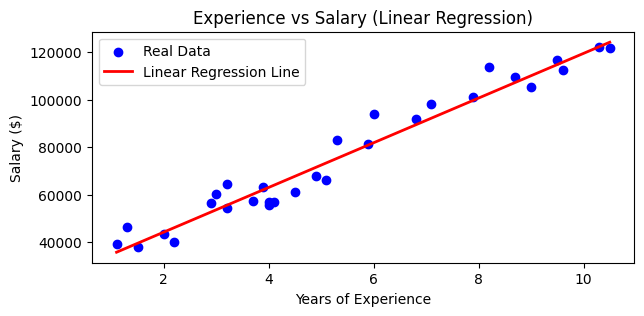

Model Score (R^2): 0.90


In [81]:
df_reg = pd.read_csv('salary_data.csv')
X = df_reg[['YearsExperience']].values
y = df_reg['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

y_pred = model_lin.predict(X) 
plt.figure(figsize=(7, 3))
plt.scatter(X, y, color='blue', label='Real Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Experience vs Salary (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()

print(f"Model Score (R^2): {model_lin.score(X_test, y_test):.2f}")

## 2. Classification (Predicting Categories)

Now, let's change the problem. We don't want a number; we want a **Label** (0 or 1).
* **Dataset:** Student Study & Sleep hours.
* **Target:** Did they Pass (1) or Fail (0)?

We will compare 3 popular algorithms.

### A. Logistic Regression

**Wait, isn't it "Regression"?**
Yes, the name is confusing. It is actually a classification algorithm.
* **The Logic:** Instead of a straight line going to infinity, it uses an **"S-shaped" curve** (Sigmoid function).
* It calculates a probability between 0 and 1.
    * If probability > 0.5 -> Class 1 (Pass)
    * If probability < 0.5 -> Class 0 (Fail)
* **Best for:** Simple binary problems (Yes/No).

<img src="logistic.png" width="400" height="300">

###  How does Logistic Regression Learn?

It might look complicated, but the logic is simple:

1.  **The "S" Curve (Sigmoid):** Unlike Linear Regression which draws a straight line, Logistic Regression draws an "S" shaped curve. This curve squeezes every value between **0 and 1**.
2.  **Probability:** The model outputs a probability score (e.g., 0.85).
    * *Example:* "There is an 85% chance this student will pass."
3.  **The Threshold (0.5):**
    * If score > 0.5 $\rightarrow$ Predict **1 (Pass)**
    * If score < 0.5 $\rightarrow$ Predict **0 (Fail)**

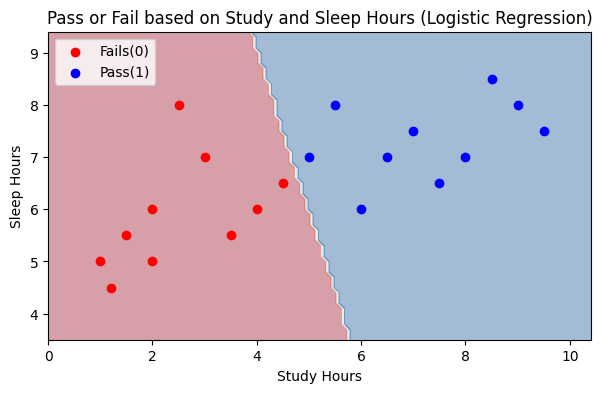

In [82]:


df = pd.read_csv('classification_data.csv')
X = df[['Study_Hours', 'Sleep_Hours']].values
y = df['Pass'].values

model = LogisticRegression()
model.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(7, 4))

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Fails(0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Pass(1)')

plt.title('Pass or Fail based on Study and Sleep Hours (Logistic Regression)')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.show()

## Support Vector Machine (SVM)

**Model Description:**
Imagine you are trying to separate two groups of people with a **Street**.
* **Logistic Regression** tries to find *any* line that separates them.
* **SVM** tries to find the **Widest Street** (Maximum Margin) possible between the two groups. It wants to stay as far away as possible from both teams to be safe.

 <b>IMPORTANT</b>: It can be used for regression problems.

###  How does it Learn?
1.  **Support Vectors:** The model looks at the data points that are **closest** to the boundary (the "front line" soldiers). These critical points are called **Support Vectors**.
2.  **The Margin:** It calculates the distance between these front-line soldiers and the street.
3.  **Optimization:** It tries to maximize this width. The wider the street, the better the model.
    * *Note:* SVM can also draw curved lines using something called a **"Kernel Trick"**, but here we will see the "Widest Street" logic with a straight line.
    

Sometimes, a straight line is not enough. Imagine having red balls in the center of a table and blue balls surrounding them. You cannot separate them with a straight stick. You need a ring!

Here is where **Kernels** come in. They project data into higher dimensions to make it separable.

1.  **Linear Kernel:**
    * **Logic:** Draws a straight line/plane.
    * **Best for:** Simple, linear data.
    * **Analogy:** Cutting a cake with a straight knife.

2.  **Polynomial Kernel (`poly`):**
    * **Logic:** It curves the line using polynomial degrees ($x^2, x^3$).
    * **Best for:** Curved data boundaries.
    * **Analogy:** Bending a wire to separate the groups.

3.  **RBF Kernel (Radial Basis Function):**
    * **Logic:** The most powerful kernel. It lifts the data into infinite dimensions! It creates "Islands" or complex shapes.
    * **Best for:** Complex, non-linear, mixed data.
    * **Analogy:** Lifting the red balls up from the table and sliding a sheet underneath them.

<img src="svm.png" width=500 hheigth=300>

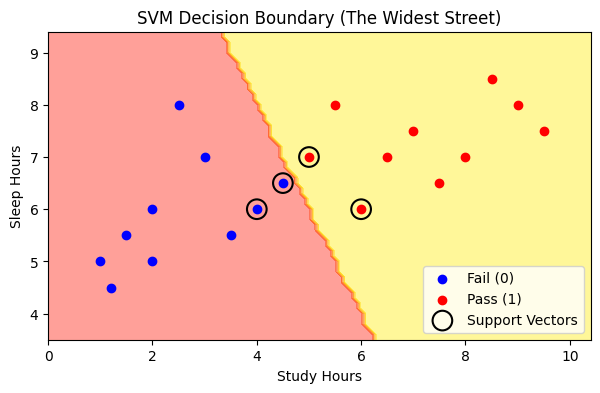

In [83]:
model_svm = SVC(kernel='linear')
model_svm.fit(X, y)

Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 4))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='autumn')


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Fail (0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Pass (1)')

plt.scatter(model_svm.support_vectors_[:, 0], model_svm.support_vectors_[:, 1], 
            s=200, linewidth=1.5, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM Decision Boundary (The Widest Street)')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.show()

## K-Nearest Neighbors (KNN)

**Model Description:**
This is the "Lazy Learner" of the group. It does not try to learn a mathematical formula. instead, it memorizes all the data points.
* **Logic:** "Tell me who your friends are, and I will tell you who you are."



<img src="knn.jpg" width=500 heigth=300>

###  How does it Learn?
Actually, it **does not learn** in the training phase!
1.  **Memorization:** It just stores the data.
2.  **Prediction Time:** When a new student comes:
    * It calculates the **Distance** between the new student and all other students (using Euclidean Distance).
    * It picks the nearest **'K'** neighbors (e.g., 3 neighbors).
    * It takes a **Vote**. If 2 neighbors are "Pass" and 1 is "Fail", the result is "Pass".

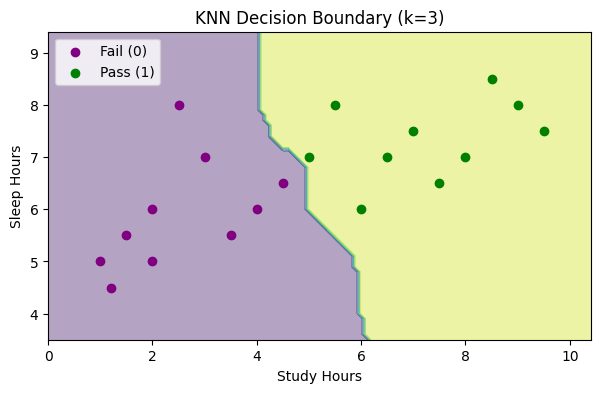

In [84]:
df = pd.read_csv('classification_data.csv')
X = df[['Study_Hours', 'Sleep_Hours']].values
y = df['Pass'].values

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 4))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', label='Fail (0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Pass (1)')
plt.title('KNN Decision Boundary (k=3)')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.show()

## Decision Tree

**Model Description:**
This model thinks like a human making a flowchart. It breaks down complex decisions into simple "Yes/No" questions.

 

<img src="decision_tree.png" width=500 heigth=300>

###  How does it Learn?
The model tries to find the **Best Split** to separate the data into pure groups.
1.  **The Root:** It looks at all features (Study vs Sleep) and asks: "Which question separates the students best?"
    * *Example:* "Is Study Hours < 4?"
2.  **Impurity (Gini/Entropy):** It measures the "messiness" of the groups.
    * If a group has 50% Pass and 50% Fail, it is **Impure** (High Entropy).
    * If a group has 100% Pass, it is **Pure**.
3.  **Recursion:** It keeps asking questions and splitting data until the groups are pure enough or we reach a limit (max depth).

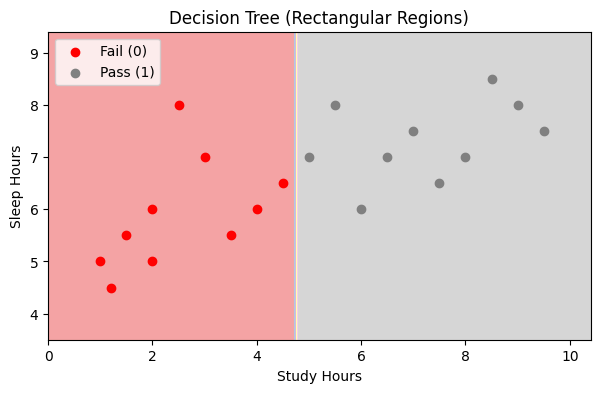

In [85]:
model_dt = DecisionTreeClassifier(max_depth=4)
model_dt.fit(X, y)

Z = model_dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 4))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Fail (0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Pass (1)')
plt.title('Decision Tree (Rectangular Regions)')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.show()

## Random Forest

**Model Description:**
A single Decision Tree can make mistakes (it might memorize the data too much). So, what do we do? We create a **Forest** of many trees!
* **Logic:** "Wisdom of the Crowd". 100 trees are smarter than 1 tree.

 

<img src="random_forest.jpg" width=500, heigth=300>

###  How does it Learn?
1.  **Bootstrap (Random Data):** It creates 100 different trees. But each tree gets a slightly different random part of the dataset.
2.  **Random Features:** When asking questions, each tree is allowed to see only a few random features (not all of them).
3.  **Voting:** When we want to predict a new student:
    * Tree 1 says: "Pass"
    * Tree 2 says: "Fail"
    * Tree 3 says: "Pass"
    * ...
    * **Majority wins!** The final result is "Pass".

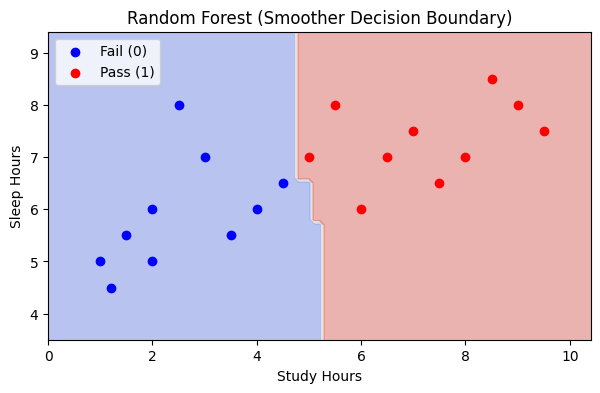

In [86]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)

Z = model_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 4))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Fail (0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Pass (1)')
plt.title('Random Forest (Smoother Decision Boundary)')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.show()

## K-Means Clustering

**Model Description:**
This is an **Unsupervised** algorithm. We do not have "Pass" or "Fail" labels here. We just have raw data, and we want to find **Groups**.

 

<img src="kmeans.png" width=500 heigth=300>

###  How does it Learn?
1.  **Initialization:** The model randomly picks **'K'** center points (Centroids).
2.  **Assignment:** Every data point finds the nearest center and joins that "Team".
3.  **Update:** The "Team Center" moves to the exact middle (average) of its members.
4.  **Repeat:** Steps 2 and 3 are repeated until the centers stop moving.

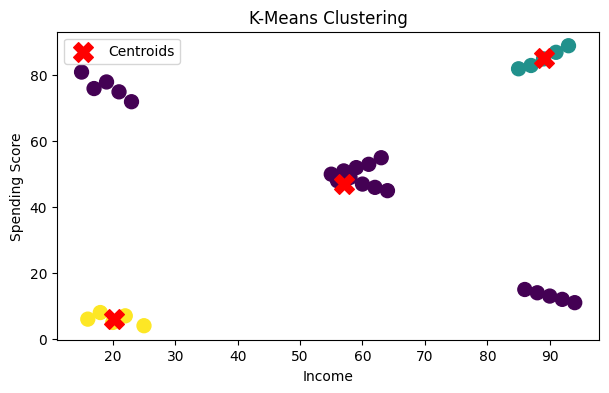

In [87]:
df_unsup = pd.read_csv('customers.csv')
X_u = df_unsup.values

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_u)

plt.figure(figsize=(7, 4))
plt.scatter(X_u[:, 0], X_u[:, 1], c=clusters, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# 4. Model Evaluation Metrics 

Building a model is easy. Knowing if it is "Good" or "Bad" is the hard part.
Just saying "My model is 90% accurate" is not enough. We need different metrics for different problems.

1.  **Regression Metrics:** Used when predicting numbers (Price, Salary).
2.  **Classification Metrics:** Used when predicting categories (Pass/Fail, Spam/Not Spam).

## A. Regression Metrics (How wrong is the number?)

Since we predict continuous numbers, we look at the **Error** (Distance between Real and Predicted value).

* **MAE (Mean Absolute Error):** On average, how much did we miss? (e.g., "I missed by $500 on average").
* **MSE (Mean Squared Error):** We square the errors. This punishes large mistakes heavily.
* **RMSE (Root Mean Squared Error):** Square root of MSE. It is in the same unit as the original data (easier to understand).
* **$R^2$ Score (R-Squared):** How well does our line fit the data?
    * **1.0:** Perfect fit.
    * **0.0:** The model is as bad as just guessing the average.


 

<img src="rmetrics.png" width=500 heigth=300>

## B. Classification Metrics (Did we guess the group right?)

For Yes/No problems, "Accuracy" can be misleading if the data is imbalanced.

* **Confusion Matrix:** A table showing 4 things:
    * **TP (True Positive):** Predicted Pass, Actually Pass. (Correct!)
    * **TN (True Negative):** Predicted Fail, Actually Fail. (Correct!)
    * **FP (False Positive):** Predicted Pass, Actually Fail. (False Alarm )
    * **FN (False Negative):** Predicted Fail, Actually Pass. (Missed Opportunity )

* **Accuracy:** (TP + TN) / Total. Overall success.
* **Precision:** When model says "Pass", is it really "Pass"? (Trustworthiness).
* **Recall:** Out of all real "Pass" students, how many did we find? (Ability to find).
* **F1 Score:** The balance between Precision and Recall. If F1 is high, the model is solid.


<img src="images.png" width=500 heigth=300>